In [3]:
using DelimitedFiles
powietrze_covid=readdlm("powietrze_covid.txt")
powietrze_przed=readdlm("powietrze_przed.txt")
powiet_przed=Float16.(powietrze_przed[2:end, 2])
powiet_covid=Float16.(powietrze_covid[2:end, 2])
zarazenia=readdlm("dane_zarazen_COVID.txt")

366×3 Array{Any,2}:
 "Data"               "Narastaj\xb9co"       "\xa3\xb9cznydziennyprzyrost"
 "2020-03-04"        1                      1
 "2020-03-05"        1                      0
 "2020-03-06"        5                      4
 "2020-03-07"        6                      1
 "2020-03-08"       11                      5
 "2020-03-09"       17                      6
 "2020-03-10"       22                      5
 "2020-03-11"       31                      9
 "2020-03-12"       51                     20
 "2020-03-13"       68                     17
 "2020-03-14"      104                     36
 "2020-03-15"      125                     21
 ⋮                                      
 "2021-02-20"  1638767                   7038
 "2021-02-21"  1642658                   3890
 "2021-02-22"  1648962                   6310
 "2021-02-23"  1661109                  12146
 "2021-02-24"  1673252                  12142
 "2021-02-25"  1684788                  11539
 "2021-02-26"  1696885              

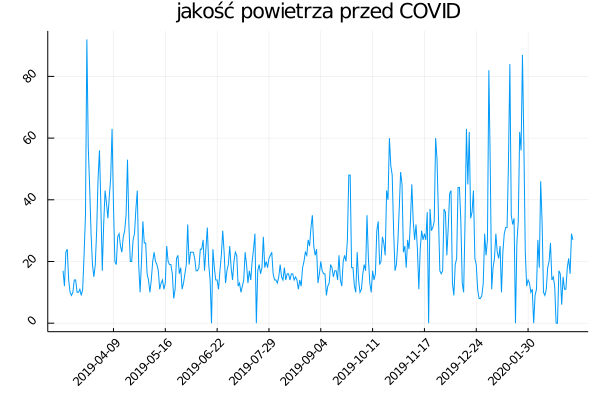

In [6]:
using Plots
plota = plot(zarazenia[2:end, 1], powiet_covid, rotation=45 , ylabel="ilość pyłu zawieszonego - µg/m3",legend=false, title="jakość powietrza w COVID")
plotb = plot(powietrze_przed[2:end,1], powiet_przed, rotation=45 ,legend=false, title="jakość powietrza przed COVID")

In [ ]:
using Plots
function merge_series!(sp1::Plots.Subplot, sp2::Plots.Subplot)
    append!(sp1.series_list, sp2.series_list)
    Plots.expand_extrema!(sp1[:xaxis], xlims(sp2))
    Plots.expand_extrema!(sp1[:yaxis], ylims(sp2))
    Plots.expand_extrema!(sp1[:zaxis], zlims(sp2))
    return sp1
end

function merge_series!(plt, plts...)
    for (i, sp) in enumerate(plt.subplots)
        for other_plt in plts
            if i in eachindex(other_plt.subplots)
                merge_series!(sp, other_plt[i])
            end
        end
    end
    return plt
end

plt1 = plot(rand(10, 4), layout = 4, color = 1, label = "plt1")
plt2 = plot(0.1 * rand(20, 2), layout = 2, color = 2, label = "plt2")
plt3 = plot(5 * rand(5, 3), layout = 3, color = 3, label = "plt3")

plt = merge_series!(plt1, plt2, plt3)